# Lucky Last Lab 16: visualising, interpolating, and deconvoluting data

In this lab, we'll look at a number of different ways to visualise and plot 1D and 2D data. As a final exercise, we'll combine this with the discrete Fourier transform from lab 15 to produce what looks like a miraculous "unblurring" of an image.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

We begin with a simple example to warm up. A data set called `scores.txt` is provided, containing the results of 1000 measurements of some scalar quantity.

**Use `np.loadtxt` to import these data.**

In [2]:
np.loadtxt('scores.txt')

array([ 2.25370716,  3.04375838,  3.12687635,  3.34212914,  3.38464695,
        3.42126304,  3.48494444,  3.49274675,  3.59316707,  3.66327789,
        3.69117248,  3.8171439 ,  3.82106337,  3.85175756,  3.9280894 ,
        3.98940817,  4.00986875,  4.02562554,  4.04559257,  4.04952   ,
        4.07336082,  4.07437489,  4.07998252,  4.16551739,  4.16902658,
        4.17436201,  4.20271856,  4.21880998,  4.22327924,  4.22861508,
        4.23584682,  4.2655126 ,  4.2816187 ,  4.31232839,  4.31556608,
        4.3173321 ,  4.33044841,  4.35535883,  4.36373558,  4.36413524,
        4.36440239,  4.36898012,  4.37188028,  4.40657781,  4.41167887,
        4.42073182,  4.43871162,  4.4515316 ,  4.46092976,  4.46563602,
        4.52003684,  4.52812832,  4.52935581,  4.53637978,  4.53827409,
        4.56783119,  4.57545871,  4.58145671,  4.58213539,  4.59965946,
        4.60102852,  4.61325547,  4.61958181,  4.634366  ,  4.63635807,
        4.64350436,  4.64460986,  4.65283589,  4.66353865,  4.66

**Use the *array methods* `min`, `max`, `mean`, and `std` to determine some summary statistics of these data.** *Hint:* if you have an array variable `my_array`, the syntax of these methods is `my_array.max()` and so forth.

In [30]:
my_array = np.loadtxt('scores.txt')
minimum = my_array.min()
maximium = my_array.max()
mean = my_array.mean()
std = my_array.std()
print(minimum, maximium, mean, std)

2.2537071636690387 16.27208061839321 7.220016684365331 2.3426864101073854


Of course, nothing replaces looking at these data directly. A suitable plot type would be a *histogram*, which can be made using the `plt.hist()` function. **Plot a histogram of these data.**

<IPython.core.display.Javascript object>


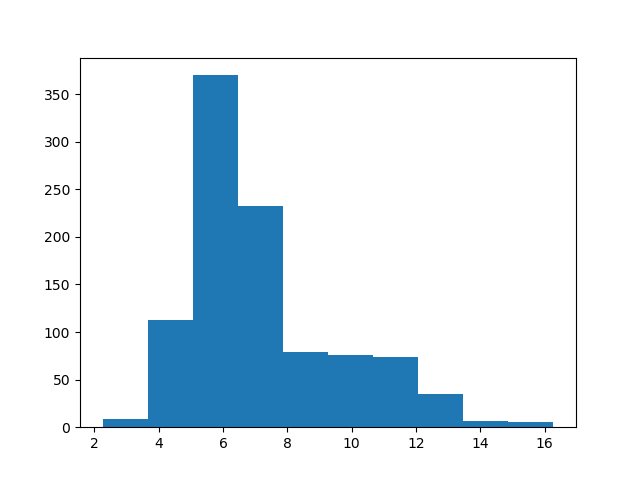

(array([  9., 113., 370., 232.,  79.,  76.,  74.,  35.,   7.,   5.]),
 array([ 2.25370716,  3.65554451,  5.05738185,  6.4592192 ,  7.86105655,
         9.26289389, 10.66473124, 12.06656858, 13.46840593, 14.87024327,
        16.27208062]),
 <a list of 10 Patch objects>)

In [31]:
plt.hist(np.loadtxt('scores.txt'))

Hmmm, that doesn't look quite like a normal distribution. **Try increasing the number of bins** (columns), using the optional `bins=...` argument to `hist()`.

<IPython.core.display.Javascript object>


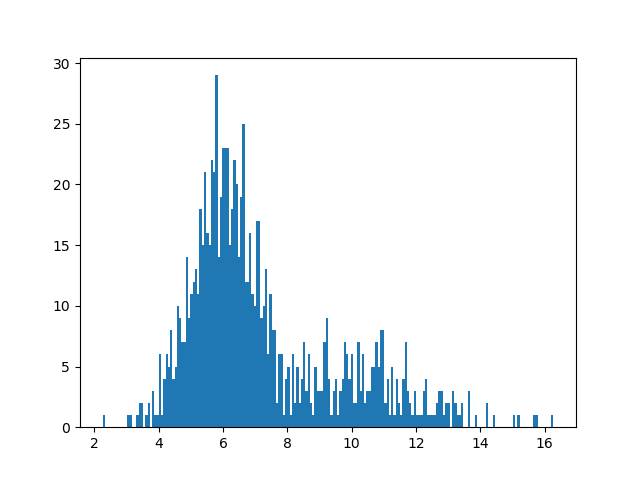

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  2.,  2.,  0.,  1.,  2.,  0.,  3.,  1.,  1.,  6.,
         1.,  4.,  6.,  5.,  8.,  4.,  5., 10.,  9.,  7.,  7., 14.,  9.,
        11., 12., 13., 11., 18., 15., 21., 16., 15., 22., 21., 29., 14.,
        19., 23., 23., 23., 15., 18., 22., 20., 14., 19., 25., 12., 12.,
        16., 11., 10., 17., 17.,  9., 10., 13.,  6., 11.,  8.,  8.,  2.,
         6.,  6.,  1.,  4.,  5.,  1.,  6.,  2.,  5.,  2.,  4.,  7.,  3.,
         6.,  2.,  1.,  5.,  3.,  3.,  3.,  7.,  9.,  4.,  1.,  3.,  4.,
         1.,  3.,  4.,  7.,  6.,  4.,  6.,  2.,  2.,  7.,  3.,  6.,  2.,
         3.,  3.,  5.,  5.,  7.,  5.,  8.,  8.,  2.,  4.,  1.,  5.,  1.,
         4.,  2.,  1.,  4.,  7.,  3.,  2.,  1.,  3.,  1.,  1.,  1.,  3.,
         4.,  1.,  1.,  1.,  1.,  2.,  3.,  3.,  1.,  2.,  2.,  0.,  3.,
         2.,  1.,  1.,  2.,  0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.

In [33]:
plt.hist(np.loadtxt('scores.txt'), bins=200)

**What do you conclude about the distribution of these data?** For instance, how many *modes* (peaks of probability) are there? Do you think these data are drawn from a Gaussian distribution?

In [6]:
#The distribution of the data has two modes as it appears to have 2 peaks when averaging over the above peaks

Now let's try loading some 2D data. An example is provided as `score_pairs.txt`. This array has two columns: the two points in each row correspond to two different measurements on the same sample.

**Load these data using `np.loadtxt` as before. Use `plt.hist2d`** (or, if you like, `plt.hexbin`) **to plot a 2D histogram of them. Where are most of the points concentrated?** Again, you may want to play with the number of bins.

*Hint*: Like `plot`, `hist2d` requires two arguments, one of x values and one of y. Thus you will need to pass the first and second column separately, using appropriate array slicing. Consult the `shape` of the data array if you are uncertain.

<IPython.core.display.Javascript object>


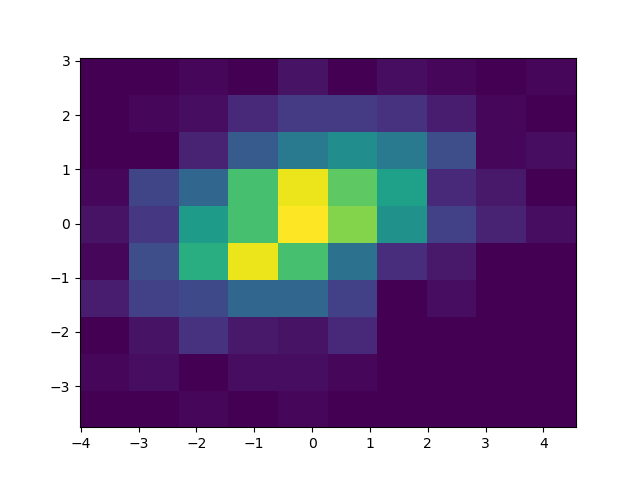

(array([[ 0.,  1.,  0.,  5.,  1.,  3.,  1.,  0.,  0.,  0.],
        [ 0.,  2.,  3., 12., 15., 10., 13.,  0.,  1.,  0.],
        [ 1.,  0.,  9., 14., 40., 35., 21.,  6.,  2.,  1.],
        [ 0.,  2.,  4., 21., 62., 45., 45., 18.,  7.,  0.],
        [ 1.,  2.,  3., 21., 45., 64., 62., 26., 11.,  3.],
        [ 0.,  1.,  7., 12., 24., 52., 48., 31., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  8., 32., 36., 26.,  9.,  2.],
        [ 0.,  0.,  0.,  2.,  4., 12.,  7., 15.,  5.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  6.,  4.,  1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  1.]]),
 array([-4.01251132, -3.15490193, -2.29729255, -1.43968317, -0.58207379,
         0.27553559,  1.13314497,  1.99075435,  2.84836373,  3.70597311,
         4.56358249]),
 array([-3.75645463, -3.07462114, -2.39278765, -1.71095416, -1.02912067,
        -0.34728718,  0.33454631,  1.01637979,  1.69821328,  2.38004677,
         3.06188026]),
 <matplotlib.collections.QuadMesh at 0x8353873eb8>)

In [32]:
score_pairs = np.loadtxt('score_pairs.txt')
plt.hist2d(score_pairs[:,0],score_pairs[:,1])

This sort of plot is appropriate when data come as pairs of measurements: for instance, the height and weight of a person, or the $x$ and $y$ coordinates where a particular plant species was observed.

Another sort of 2D data occurs when we make measurements as a function of two dependent variables – for instance, measuring the height of a mountain as a function of $x$ and $y$. The easiest case is where $x$ and $y$ form a regular grid. Data of this sort are provided as `2dgrid.txt`. 

**Load these data using `np.loadtxt`. Plot them using `plt.imshow`.**

<IPython.core.display.Javascript object>


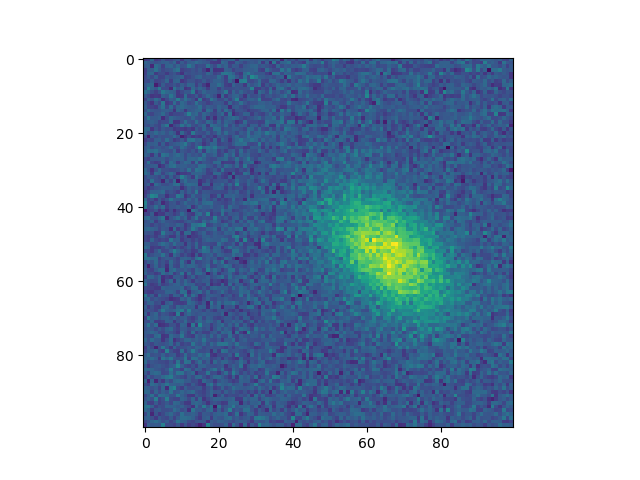

In [34]:
grid = np.loadtxt('2dgrid.txt')
plt.imshow(grid)

Note two peculiarity about this plot: first, the origin is by default taken to be in the *top* left corner, which is the convention for computing but not usually helpful in science. To fix this, **use the optional argument `origin='lower'`.** Second, there is no information in the grid of data about what the $x$ and $y$ coordinates actually represent. To fix this, **use the optional `extent` argument**, given that these data represent an $x$ span of $-$0.7 to 0.35 and a $y$ span of 1.55 to 2.4. **Check your results show a peak at $(0, 2)$.**

<IPython.core.display.Javascript object>


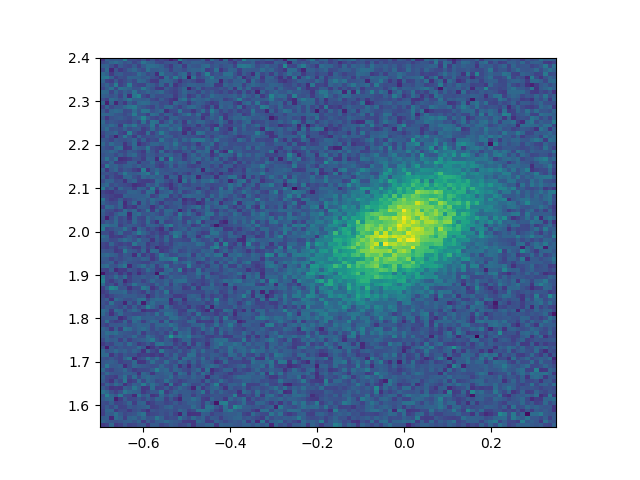

In [35]:
#?plt.imshow
plt.imshow(grid, origin= 'lower', extent = (-.7,.35,1.55,2.4))

▶ **CHECKPOINT 1**

We can use the same methods `max`, `min`, `mean`, and `std` to characterise 2D data, but there is an extra twist here: the optional `axis` argument lets us specify a single axis to look over. To see what this does, consider the following simple example:

In [10]:
my_array = np.array([[1, 2],[3, 4]])
print(my_array)
print(my_array.max())
print(my_array.max(axis=0))
print(my_array.max(axis=1))

[[1 2]
 [3 4]]
4
[3 4]
[2 4]


Use this method to **calculate the maximum value in *every row* of these data, and plot this as a function of $y$.**

*Hint*: use a suitable `linspace` to give the $y$ values. You can determine how many points are necessary using the `shape` property of an array: you'll need the first element of this array (why?).

<IPython.core.display.Javascript object>


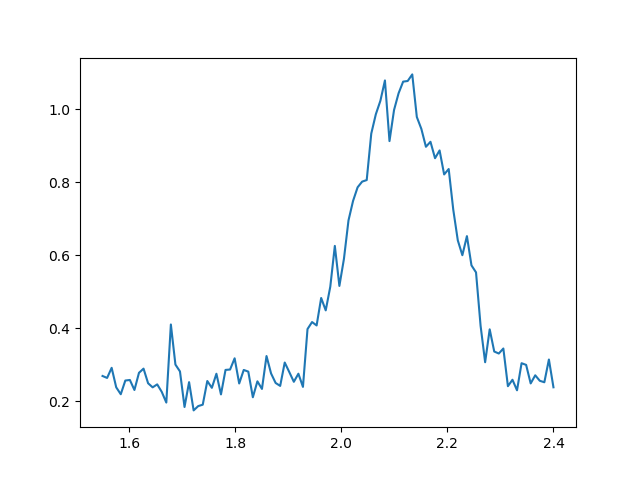

(100, 100)

In [61]:
y = np.linspace(1.55,2.4,100)
plt.plot(y, grid.max(axis=0))
grid.shape

Similarly **calculate the maximum value in *every column* of these data, and plot this as a function of $x$.**

In [64]:
#plt.plot(, grid.max(axis =1))

Now let's take a different tack, by plotting a function in two dimensions. We can do this with the help of the `np.meshgrid` function. **Examine the following code and see if you can convince yourself** – looking at the documentation as well if you like – **of what this function does.**

In [13]:
np.meshgrid((0, 1, 2), (4, 5, 6, 7))

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]), array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6],
        [7, 7, 7]])]

We use this as follows, to calculate *Himmelblau's function* $f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$:

In [37]:
# Himmelblau's function
x, y = np.linspace(-5, 5), np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

The `contour` function is used to plot "contours" joining points that have equal values of this function:

<IPython.core.display.Javascript object>


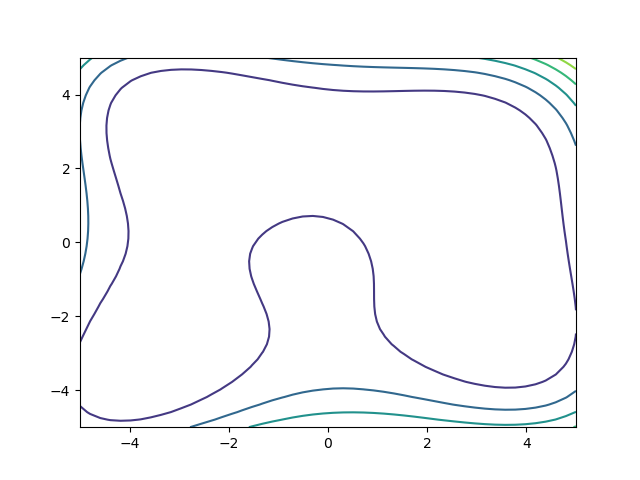

In [38]:
plt.figure()
plt.contour(X, Y, Z)

The default settings here don't seem to be particularly helpful. The fourth, optional argument of `contour` can either be an integer, which is interpreted as a number of contours to draw, or a list/tuple/array of values, which is interpreted as values at which to draw contours. **Find a suitable value of this argument to show clearly where the local maxima, local minima, and saddle points are in the given range $-5 \leq x, y \leq 5$. How many of each are there?**

<IPython.core.display.Javascript object>


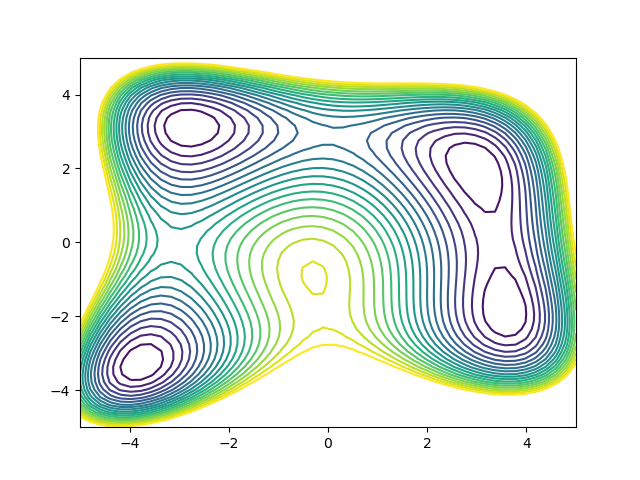

In [39]:
plt.figure()
plt.contour(X, Y, Z,np.arange(0,200,10), origin='lower',extent=(-5,5,-5,5))

The `contour` function relies on the data being provided on a grid. If they are not, we first have to perform a separate interpolation step, using the `griddata` function from `scipy.interpolate`.

In [17]:
from scipy.interpolate import griddata

Some data points drawn from this same function, presented in three columns ($x, y, f(x,y)$), are available as `nogrid.txt`:

In [18]:
not_gridded = np.loadtxt('nogrid.txt')

The syntax of `nogrid` is a little tricky, so I've provided an example for you. The first argument is the set of $(x, y)$ points; the second is the values of $f(x,y)$, and the third is the grid to interpolate onto.

In [19]:
gridded = griddata(not_gridded[:,0:2], not_gridded[:,2], (X, Y))

Use `contour` to **plot the newly gridded data** `gridded` on the same `X, Y` grid as before. Use `plot` to **plot the ungridded data points** `not_gridded[:,0]` against `not_gridded[:,1]` **on the same figure**. You should see that the positions of the available data are heavily influencing the contours drawn.

<IPython.core.display.Javascript object>


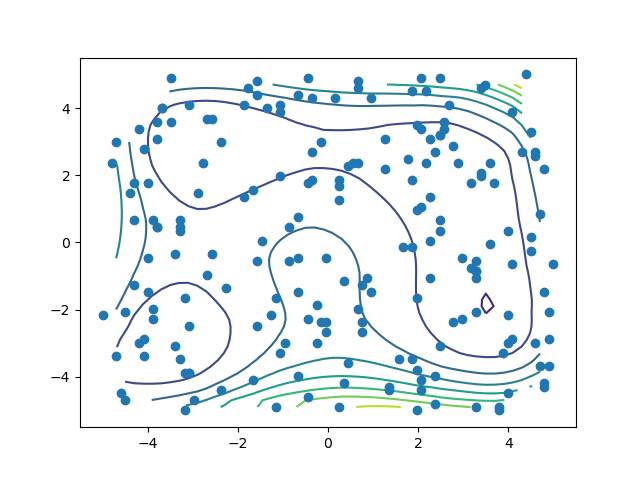

In [40]:
plt.contour(gridded, origin='lower',extent=(-5,5,-5,5))
plt.plot(not_gridded[:,0],not_gridded[:,1],'o')

**Repeat the gridding step using the optional argument `method='cubic'`, a more sophisticated interpolation routine. Make a new plot of these data, again with the ungridded data points on top. Check that your results are more similar to the original function.**

<IPython.core.display.Javascript object>


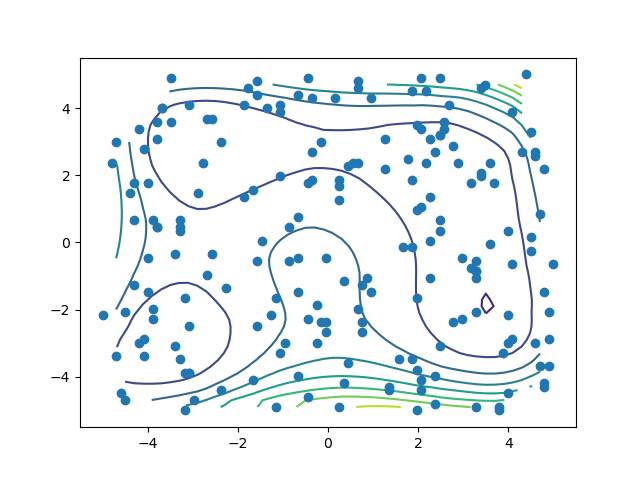

In [41]:
gridded = griddata(not_gridded[:,0:2], not_gridded[:,2], (X, Y), method = "cubic")
plt.contour(gridded, origin='lower',extent=(-5,5,-5,5))
plt.plot(not_gridded[:,0],not_gridded[:,1],'o')

▶ **CHECKPOINT 2**

## Deconvolution

Our final task will combine 2D plotting with Fourier transforms to "undo" the blurring that has made an image unreadable.

A blurred image is provided as `deconvolve.npy`. **Use `np.load`** (NB, *not* `loadtxt`) **to load this** (call it `blurred`) **and `plt.imshow` to plot it.**

<IPython.core.display.Javascript object>


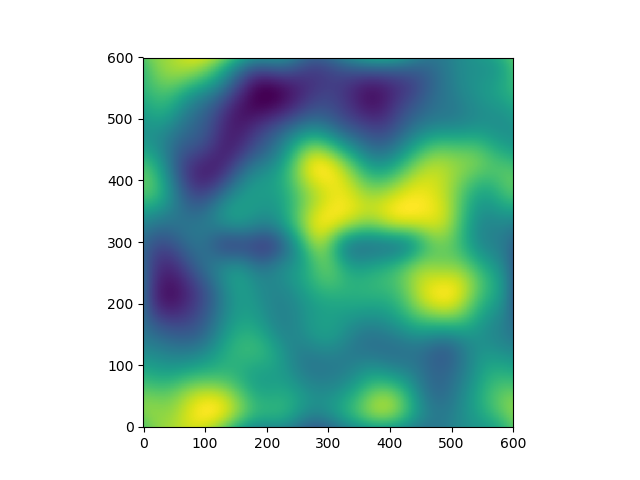

In [42]:
blurred = np.load('deconvolve.npy')
plt.imshow(blurred,origin='lower')

We know that this image has been blurred with a Gaussian blur, so need to set up a suitable Gaussian to deconvolve with. Once again we use `meshgrid`:

In [43]:
x = y = np.arange(-300, 300, 1)
X, Y = np.meshgrid(x, y)
sigma = 22
blurrer = np.exp(-(X**2 + Y**2)/(2*sigma**2))

**Check you understand what the code above does, then use `imshow` to plot the array `blurrer`.**

<IPython.core.display.Javascript object>


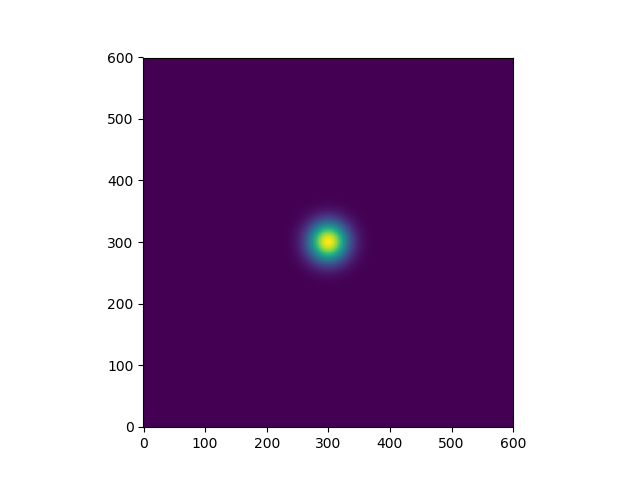

In [44]:
plt.imshow(blurrer, origin='lower')

At the moment, `blurrer` follows the usual scientific convention, with the origin in the middle of the array. We need to shift it to follow the discrete Fourier transform convention, with the origin at the beginning of each axis, for which you may recall we can use the `fftshift` function:

In [45]:
blurrer = np.fft.fftshift(blurrer)

**Use `np.fft.fft2`**, the 2D Fourier transform function, **to transform both `blurrer` and `blurred`, calling your results `ftblurrer` and `ftblurred`.**

In [46]:
ftblurred = np.fft.fft2(blurred)
ftblurrer = np.fft.fft2(blurrer)

Rather than plotting these results directly, we will plot the regions where there is significant signal:

<IPython.core.display.Javascript object>


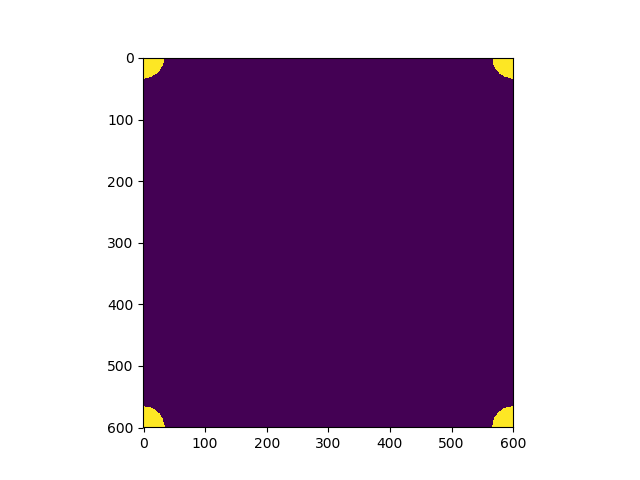

<IPython.core.display.Javascript object>


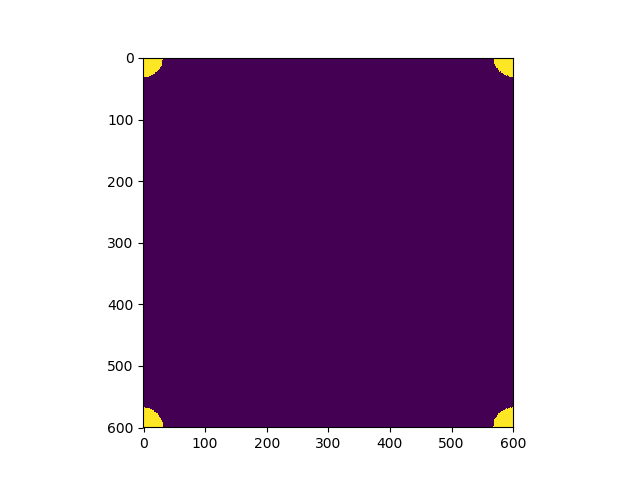

In [47]:
plt.figure()
plt.imshow(abs(ftblurrer) > 1e-10)
plt.figure()
plt.imshow(abs(ftblurred) > 1e-10)

You will see that only low-frequency components (*i.e.*, the corners of the plot) are present in both FTs.
**Adjust `sigma` from the `blurrer` calculation until these regions above $10^{-7}$ are about the same size, but slightly larger in `blurrer` than `blurred`.** At this point, we are using all the available information.

We're now ready to deconvolve. We divide through by `ftblurrer` *only in those regions where this value is not so small that it will cause problems*:

In [49]:
ftblurred[abs(ftblurrer) > 1e-10] /= ftblurrer[abs(ftblurrer) > 1e-10]

Now **use `np.fft.ifft2` to inverse Fourier transform `ftblurred`, and `imshow` to plot it.**

<IPython.core.display.Javascript object>


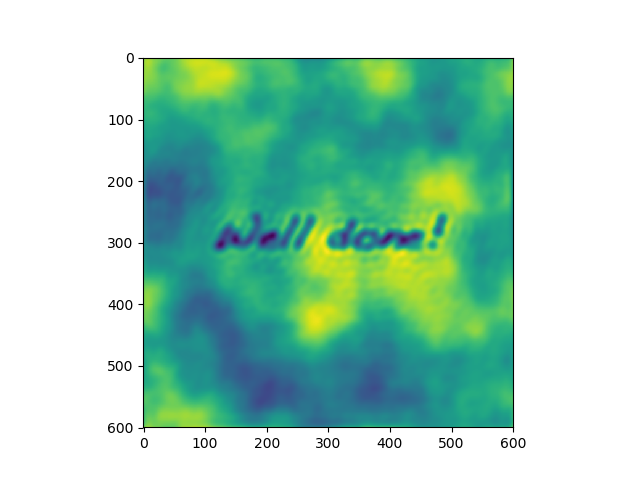

In [50]:
inv_ftblurred = abs(np.fft.ifft2(ftblurred))
plt.imshow(inv_ftblurred)

*Hint:* If your result is still blurred, `sigma` is too small; if it looks completely unlike the input, `sigma` is too large.

▶ **CHECKPOINT 3**

**Extension:** Experiment with different `sigma` values. What happens when this value is too small or too large? Why?